In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [102]:
warnings.filterwarnings(action = 'ignore')

In [346]:
train = pd.read_csv('C:/Users/whileduck/Desktop/code/train.csv')
test = pd.read_csv('C:/Users/whileduck/Desktop/code/test.csv')

In [4]:
df = train.copy()

In [5]:
df = df.drop('id',axis  =1)
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


# About Data set 

* Gravity :  specific gravity, the density of the urine relative to water
* Ph : the negative logarithm of the hydrogen ion
* osmo : a unit in biology and medicine but not in physical chemistry
* cond(conductivity) : One Mho is mone reciprocal Ohm. conductivity is proportional to the concentration of charged isons in solution
* urea : urea concentration in millimoles per litre 
* clac (calcium) : concentration in millimolesllitre

# EDA

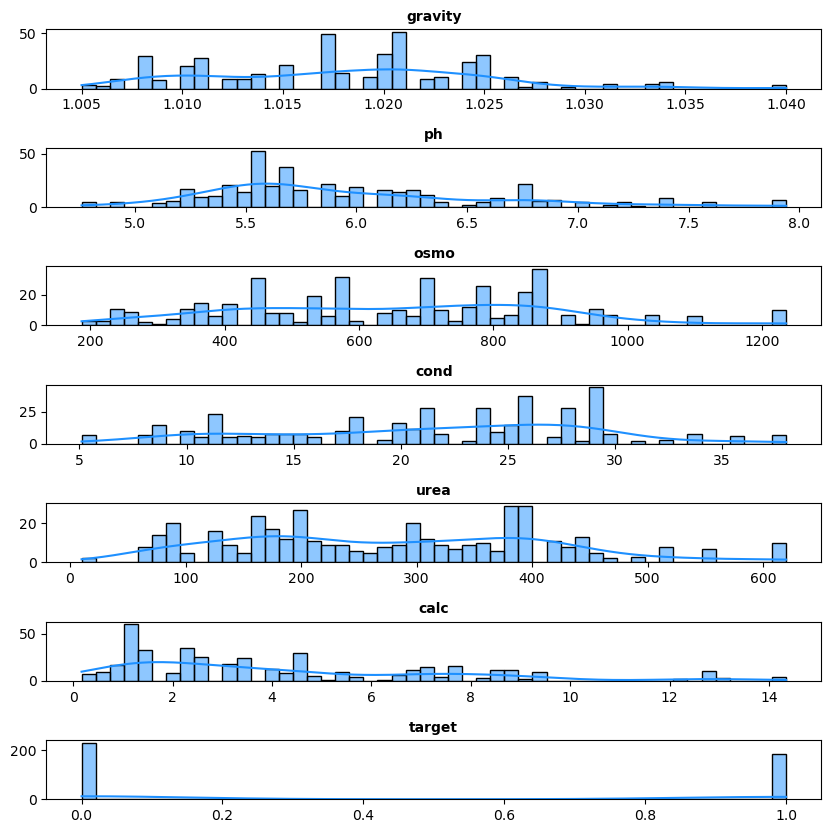

In [281]:
cols = df.columns

fig,ax = plt.subplots(nrows = len(cols),
                      figsize = (10,10))

plt.subplots_adjust(hspace = 1)

for i,col in enumerate(cols):
    
    sns.histplot(df[col],
                kde = True,
                bins = 50,
                ax = ax[i],
                color = 'dodgerblue')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(col, fontdict = {'fontsize':10,
                                    'weight':'bold'})

Text(0.5, 1.0, 'Heatmap')

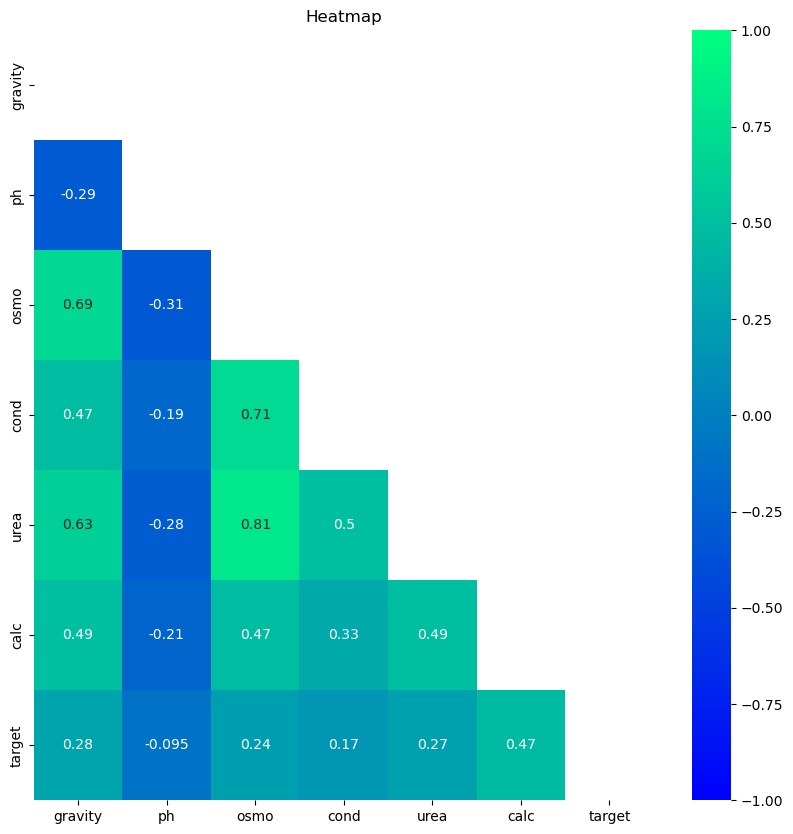

In [318]:
corr = df.corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize = [10,10])

sns.heatmap(corr,mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'winter')
plt.title("Heatmap")

Text(0.5, 1.05, 'pair plot for variables having correlation over 0.6')

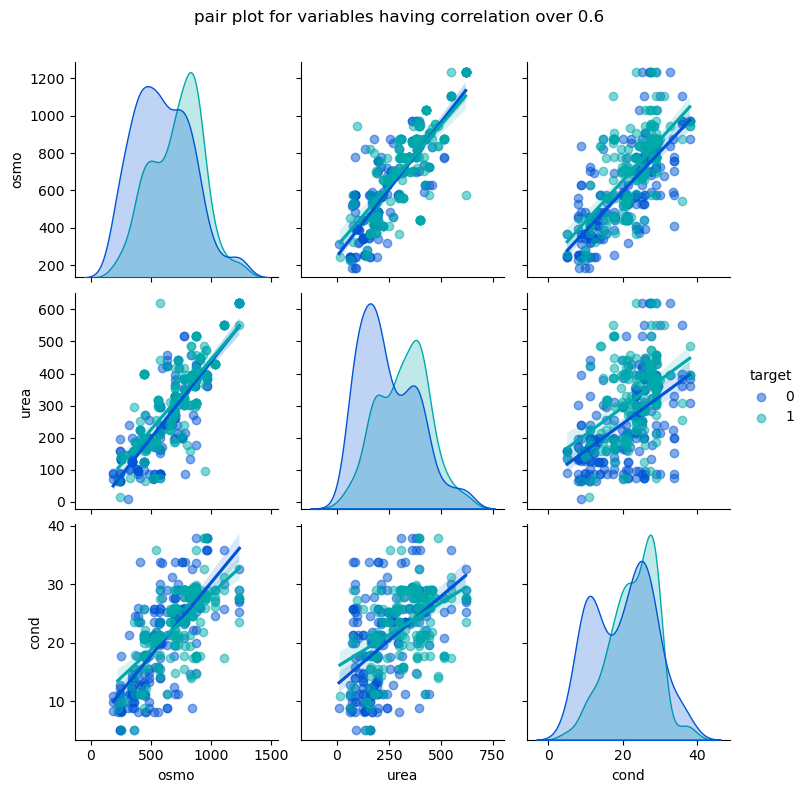

In [286]:
sns.pairplot(df[['osmo', 'urea', 'cond', 'target']], hue='target', kind='reg',
             plot_kws = {'scatter_kws':{'alpha':0.5}}, palette = 'winter')

plt.suptitle("pair plot for variables having correlation over 0.6", y = 1.05)

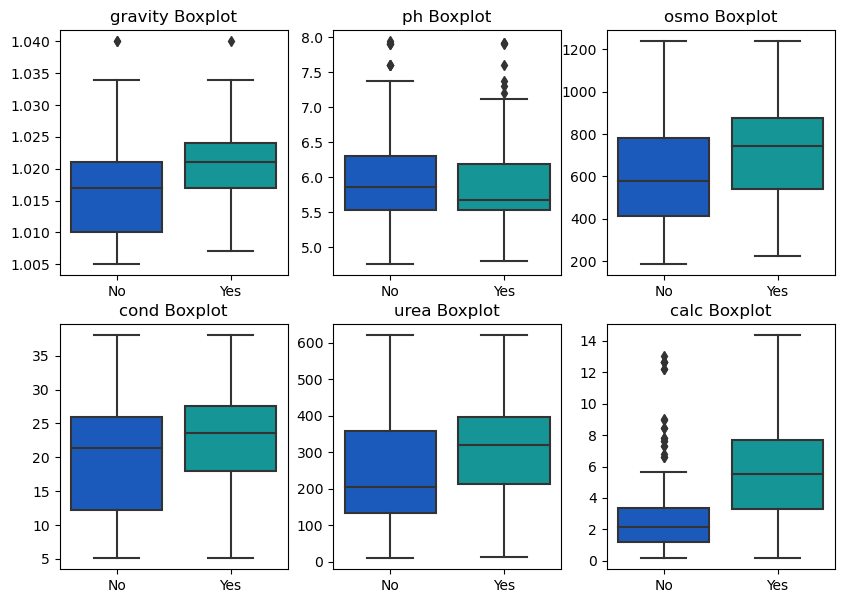

In [287]:
cols = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

fig , ax = plt.subplots(nrows= 2 ,ncols = int(len(cols)/2),
                        figsize = [10,7])
ax = ax.flatten()

for i,col in enumerate(cols):
    
    sns.boxplot(data = df,
                x = 'target',
                y = col,
                palette= 'winter',
                ax = ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title('')
    ax[i].set_xticklabels(['No','Yes'])
    ax[i].set_title(f'{col} Boxplot' )

# Modeling

In [289]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split,KFold
from sklearn.metrics import roc_curve, auc,make_scorer,confusion_matrix

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [66]:
X = df.drop('target',axis = 1)
Y = df['target']

In [313]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 77, stratify = Y)

# Hyperparmeter 

In [319]:
logist_params = {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
random_params = {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
ada_params = { 'n_estimators': 100, 'learning_rate': 0.1, 'algorithm': 'SAMME'}
xgb_params = {'n_estimators': 100,'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 3,'subsample': 0.8}
cat_params = {'n_estimators':100, 'learning_rate':0.5, 'depth':6, 'l2_leaf_reg':3}
lgbm_params = {'n_estimators': 100,'learning_rate': 0.5, 'max_depth': None}

In [315]:
models = [LogisticRegression(**logist_params),RandomForestClassifier(**random_params),
            AdaBoostClassifier(**ada_params),XGBClassifier(**xgb_params),CatBoostClassifier(**cat_params),LGBMClassifier(**lgbm_params)]

proba_list = []

for model in models:
    
    model.fit(x_train,y_train)
    proba = model.predict_proba(x_test)[:,1]
    proba_list.append(proba)

0:	learn: 0.6108378	total: 606us	remaining: 60ms
1:	learn: 0.5618769	total: 1.16ms	remaining: 56.6ms
2:	learn: 0.5333084	total: 1.64ms	remaining: 53.2ms
3:	learn: 0.5023675	total: 2.08ms	remaining: 50ms
4:	learn: 0.4831603	total: 2.55ms	remaining: 48.5ms
5:	learn: 0.4698371	total: 2.95ms	remaining: 46.2ms
6:	learn: 0.4581960	total: 3.45ms	remaining: 45.8ms
7:	learn: 0.4530798	total: 3.92ms	remaining: 45.1ms
8:	learn: 0.4478364	total: 4.41ms	remaining: 44.6ms
9:	learn: 0.4429927	total: 4.91ms	remaining: 44.2ms
10:	learn: 0.4367635	total: 5.58ms	remaining: 45.1ms
11:	learn: 0.4305744	total: 6ms	remaining: 44ms
12:	learn: 0.4256961	total: 6.4ms	remaining: 42.9ms
13:	learn: 0.4093295	total: 6.85ms	remaining: 42.1ms
14:	learn: 0.4018462	total: 7.25ms	remaining: 41.1ms
15:	learn: 0.3935673	total: 7.64ms	remaining: 40.1ms
16:	learn: 0.3851977	total: 8.04ms	remaining: 39.3ms
17:	learn: 0.3711580	total: 8.47ms	remaining: 38.6ms
18:	learn: 0.3579697	total: 8.88ms	remaining: 37.8ms
19:	learn: 0.3

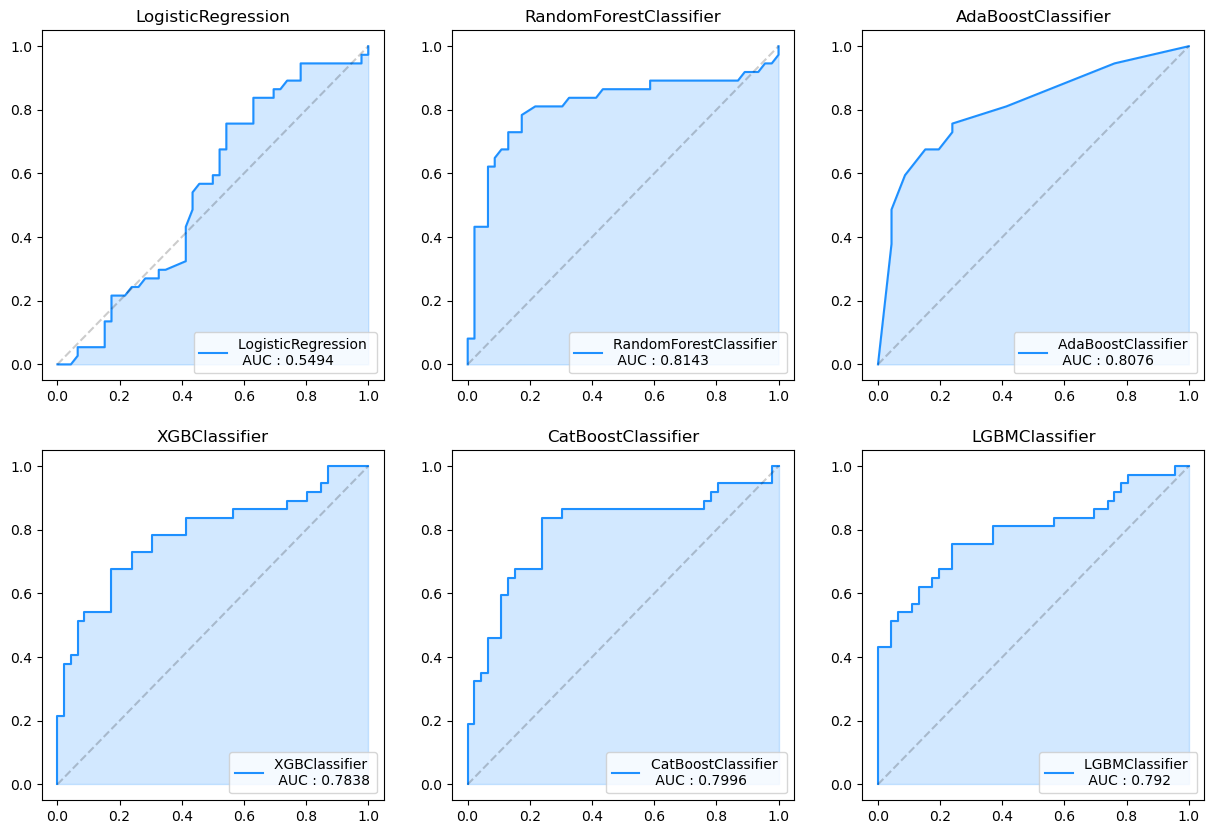

In [316]:
models_name = ['LogisticRegression','RandomForestClassifier','AdaBoostClassifier','XGBClassifier','CatBoostClassifier','LGBMClassifier']

fig,ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))

ax = ax.flatten()

for i, proba in enumerate(proba_list):
    
    fpr,tpr,_ = roc_curve(y_test,proba)
    
    auc_score = round(auc(fpr,tpr),4)
    
    ax[i].plot(fpr,tpr, c = 'dodgerblue',label = f'{models_name[i]} \n AUC : {auc_score}')
    ax[i].fill_between(fpr,tpr,0,alpha = 0.2, color = 'dodgerblue')
    ax[i].plot([0,1],[0,1], ls = '--', color = 'k',alpha = 0.2)
    ax[i].legend(loc = 'lower right')
    ax[i].set_title(f'{models_name[i]}')

0:	learn: 0.6108378	total: 747us	remaining: 74ms
1:	learn: 0.5618769	total: 1.84ms	remaining: 90ms
2:	learn: 0.5333084	total: 2.4ms	remaining: 77.8ms
3:	learn: 0.5023675	total: 2.99ms	remaining: 71.8ms
4:	learn: 0.4831603	total: 3.63ms	remaining: 69ms
5:	learn: 0.4698371	total: 4.13ms	remaining: 64.8ms
6:	learn: 0.4581960	total: 4.75ms	remaining: 63.1ms
7:	learn: 0.4530798	total: 5.38ms	remaining: 61.9ms
8:	learn: 0.4478364	total: 5.91ms	remaining: 59.7ms
9:	learn: 0.4429927	total: 6.37ms	remaining: 57.3ms
10:	learn: 0.4367635	total: 6.82ms	remaining: 55.2ms
11:	learn: 0.4305744	total: 7.29ms	remaining: 53.4ms
12:	learn: 0.4256961	total: 7.81ms	remaining: 52.3ms
13:	learn: 0.4093295	total: 8.31ms	remaining: 51.1ms
14:	learn: 0.4018462	total: 8.73ms	remaining: 49.5ms
15:	learn: 0.3935673	total: 9.27ms	remaining: 48.7ms
16:	learn: 0.3851977	total: 9.73ms	remaining: 47.5ms
17:	learn: 0.3711580	total: 10.2ms	remaining: 46.3ms
18:	learn: 0.3579697	total: 10.7ms	remaining: 45.6ms
19:	learn: 

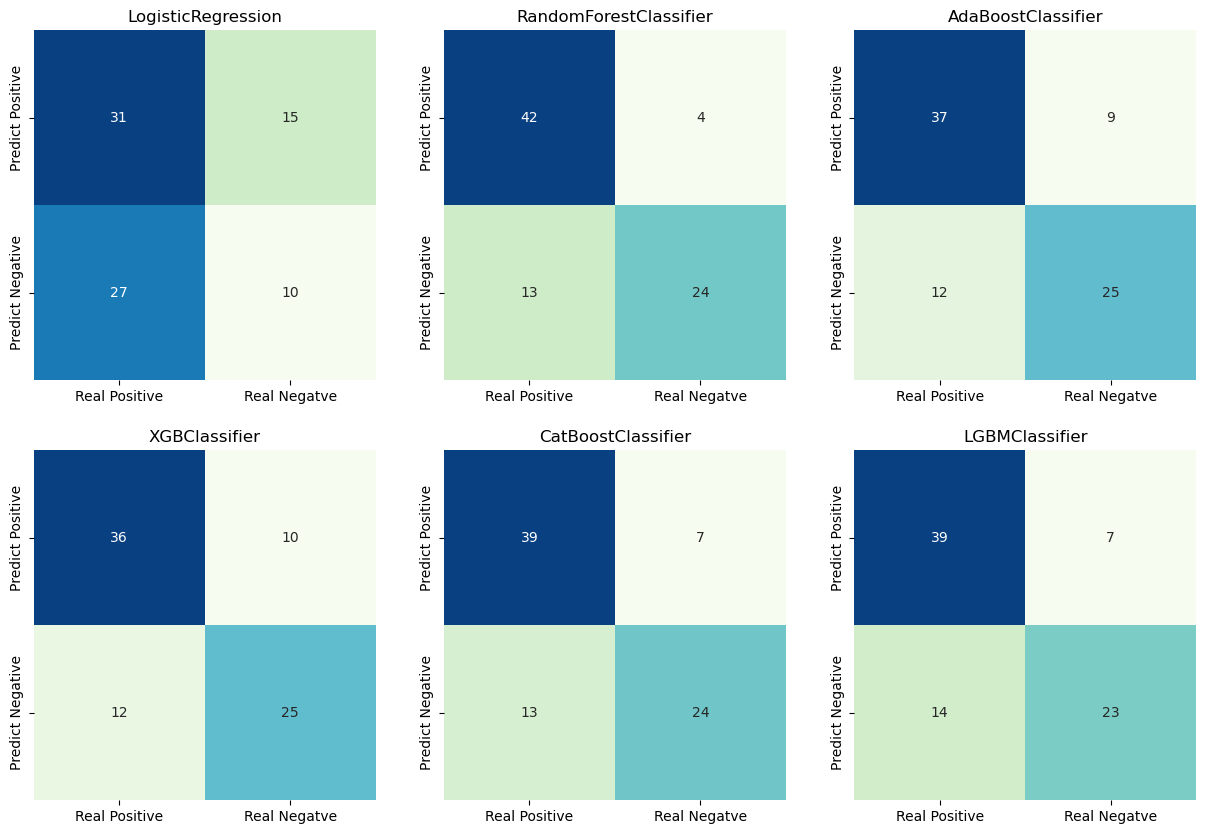

In [317]:
models = [LogisticRegression(**logist_params),RandomForestClassifier(**random_params),
            AdaBoostClassifier(**ada_params),XGBClassifier(**xgb_params),CatBoostClassifier(**cat_params),LGBMClassifier(**lgbm_params)]

models_name = ['LogisticRegression','RandomForestClassifier','AdaBoostClassifier','XGBClassifier','CatBoostClassifier','LGBMClassifier']

fig,ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))

ax = ax.flatten()

for i,model in enumerate(models):
    
    model.fit(x_train,y_train)
    
    predict = model.predict(x_test)
    
    matrix = confusion_matrix(y_test,predict)
    
    confusion = pd.DataFrame(matrix, index = ['Predict Positive','Predict Negative'],
                            columns = ['Real Positive','Real Negatve'])
    
    sns.heatmap(confusion, annot = True, cbar = False, ax = ax[i], cmap = 'GnBu')
    ax[i].set_title(models_name[i])
